# Deep Learning
## Assignment 1
### Head Pose Estimation
#### Sri Sainee Thirumurugan
##### s3774307 

Head pose estimation has many applications such as driver monitoring, attention recognition and multi-view facial analysis. This assignment is related to the head pose estimation where the goal is to develop a Deep Convolutional Neural Network to identify the head pose given an image of a person by classifying the images based on the tilt and pan of the head. Given a dataset with images of head in different positions, the objective of building a DCNN is to classify the images into the right tilt and pan positions of the head in that image. Achieving high accuracy (>90%) would be the target by developing a CNN.


###### **Loading the Dataset**
Extracting the train and test set images into dataframe





In [23]:
import zipfile

with zipfile.ZipFile('./modified_data.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

In [24]:
import glob
import pandas as pd

image_list = []
for filepath in glob.glob("./modified_data/*.jpg", recursive=True):
    filename = filepath.split("/")[2]
    image_list.append((filepath, filename))

data = pd.DataFrame(data=image_list, columns=['image_path', 'filename'])
print(data.head())
print(data.shape)

                      image_path       filename
0  ./modified_data/face_2773.jpg  face_2773.jpg
1  ./modified_data/face_2740.jpg  face_2740.jpg
2  ./modified_data/face_1019.jpg  face_1019.jpg
3    ./modified_data/face_97.jpg    face_97.jpg
4   ./modified_data/face_377.jpg   face_377.jpg
(2790, 2)


In [25]:
test_data = pd.read_csv("test_data.csv")
train_data = pd.read_csv("train_data.csv")
print(test_data.head())
print(test_data.shape)
print(train_data.head())
print(train_data.shape)

        filename  person_id  series
0    face_33.jpg          2       1
1  face_2148.jpg          2       2
2  face_2119.jpg          2       1
3  face_1262.jpg          2       1
4   face_516.jpg          2       2
(465, 3)
        filename  person_id  series  tilt  pan
0   face_790.jpg          5       1   -15   30
1  face_2445.jpg          5       1     0  -75
2  face_2266.jpg          5       2   -15  -60
3  face_2713.jpg          5       2     0  -90
4  face_2016.jpg          5       2    15  -75
(2325, 5)


The train set has 2325 images and the independent test set has 465 images.

###### **Preparing the Dataset**

In [26]:
traindata = pd.merge(left=train_data, right=data, how='left', left_on='filename', right_on='filename')
traindata

,filename,person_id,series,tilt,pan,image_path
0,face_790.jpg,5,1,-15,30,./modified_data/face_790.jpg
1,face_2445.jpg,5,1,0,-75,./modified_data/face_2445.jpg
2,face_2266.jpg,5,2,-15,-60,./modified_data/face_2266.jpg
3,face_2713.jpg,5,2,0,-90,./modified_data/face_2713.jpg
4,face_2016.jpg,5,2,15,-75,./modified_data/face_2016.jpg
...,...,...,...,...,...,...
2320,face_1977.jpg,15,1,15,90,./modified_data/face_1977.jpg
2321,face_701.jpg,15,1,-15,90,./modified_data/face_701.jpg
2322,face_1343.jpg,15,1,15,-30,./modified_data/face_1343.jpg
2323,face_851.jpg,15,2,-60,15,./modified_data/face_851.jpg


In [5]:
testdata = pd.merge(left=test_data, right=data, how='left', left_on='filename', right_on='filename')
testdata

,filename,person_id,series,image_path
0,face_33.jpg,2,1,./modified_data/face_33.jpg
1,face_2148.jpg,2,2,./modified_data/face_2148.jpg
2,face_2119.jpg,2,1,./modified_data/face_2119.jpg
3,face_1262.jpg,2,1,./modified_data/face_1262.jpg
4,face_516.jpg,2,2,./modified_data/face_516.jpg
...,...,...,...,...
460,face_2389.jpg,1,1,./modified_data/face_2389.jpg
461,face_1799.jpg,1,1,./modified_data/face_1799.jpg
462,face_637.jpg,1,2,./modified_data/face_637.jpg
463,face_788.jpg,1,2,./modified_data/face_788.jpg


###### **Data Aanlysis**
This section analyses the dataset by exploring the class labels (angle of tilt and pan), the number of instances in the classes to identify any class imbalance and to understand how the images are.


Text(0.5, 1.0, 'Exploring Series Attribute')

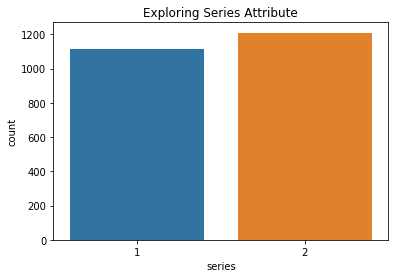

In [6]:
import seaborn as sns

sns.countplot(traindata.iloc[:,2]).set_title('Exploring Series Attribute')

There are 2 series namely 1 and 2. They are in amlost equal distribution.


Text(0.5, 1.0, 'Tilt Class Distribution')

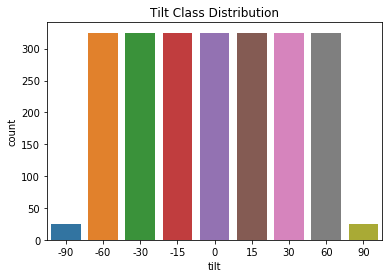

In [7]:
sns.countplot(traindata.iloc[:,3]).set_title('Tilt Class Distribution')

There are 9 classes/angles/degrees in the tilt class. All the classes are in equal distribution except for the class [-90] and [90]. There are 25 labels in these classes and 325 in the rest. This is an indication of class imbalnce. 



Text(0.5, 1.0, 'Pan Class Distribution')

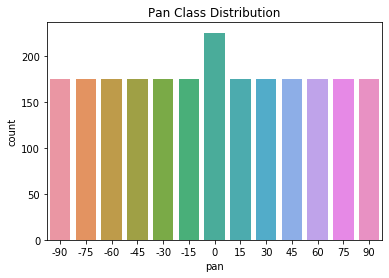

In [8]:
sns.countplot(traindata.iloc[:,4]).set_title('Pan Class Distribution')

Similarly for the pan class, there are 13 classes with the class 0 haveing the most number of instance and the remaining classes having equal number of instances. The difference is not as significant as the tilt class imbalance but still can be addressed to avoid potential biases during the training.


Text(0.5, 1.0, 'Pan Class Distribution for Series 2')

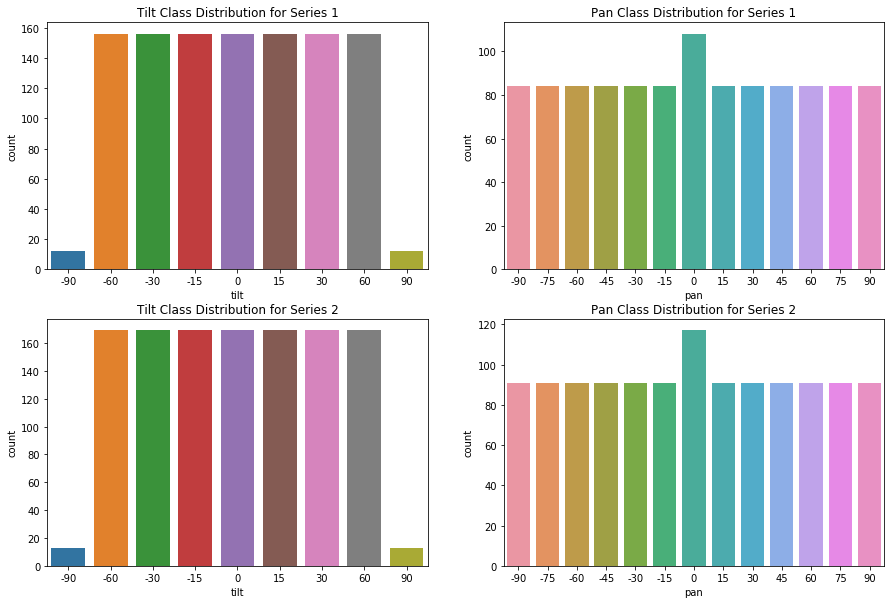

In [29]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,10))

plt.subplot(221)
data = traindata[traindata['series'] == 1]
sns.countplot(data.iloc[:,3]).set_title('Tilt Class Distribution for Series 1')

plt.subplot(222)
data = traindata[traindata['series'] == 1]
sns.countplot(data.iloc[:,4]).set_title('Pan Class Distribution for Series 1')

plt.subplot(223)
data = traindata[traindata['series'] == 2]
sns.countplot(data.iloc[:,3]).set_title('Tilt Class Distribution for Series 2')

plt.subplot(224)
data = traindata[traindata['series'] == 2]
sns.countplot(data.iloc[:,4]).set_title('Pan Class Distribution for Series 2')

On exploring the relation between series and the 2 class labels, it is evident that both the series have equal number of classes and the same class distribution. Hence it is accepted that the series attribute will not contribute or have an affect on the classes.

(144, 192, 3)

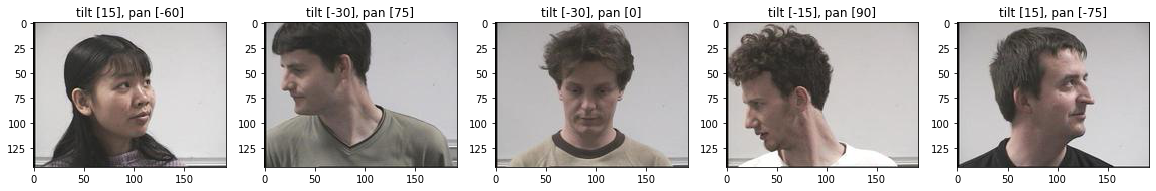

In [7]:
from random import sample
import matplotlib.image as mpimg

fig = plt.figure(figsize=(20,20))
i=1
for image_path in sample(list(traindata.iloc[:,5]),5):
    plt.subplot(1,5,i)
    img= mpimg.imread(image_path)
    plt.imshow(img)
    plt.title(str("tilt {}, pan {}".format(traindata[traindata['image_path'] == image_path].iloc[:,3].values, 
                            traindata[traindata['image_path'] == image_path].iloc[:,4].values)))
    i=i+1
    
img.shape

A random sample of images in the train set are shown above. Each image are colour image with size 144x192.

###### **Data Preprocessing**

The class labels and the images can be preprocessed before the training to make it easier for the model to learn.

In [6]:
from sklearn.preprocessing import LabelEncoder

tilt_encoder = LabelEncoder()
pan_encoder = LabelEncoder()
traindata.iloc[:,3] = tilt_encoder.fit_transform(traindata.iloc[:,3])
traindata.iloc[:,4] = pan_encoder.fit_transform(traindata.iloc[:,4])

traindata

,filename,person_id,series,tilt,pan,image_path
0,face_790.jpg,5,1,3,8,./modified_data/face_790.jpg
1,face_2445.jpg,5,1,4,1,./modified_data/face_2445.jpg
2,face_2266.jpg,5,2,3,2,./modified_data/face_2266.jpg
3,face_2713.jpg,5,2,4,0,./modified_data/face_2713.jpg
4,face_2016.jpg,5,2,5,1,./modified_data/face_2016.jpg
...,...,...,...,...,...,...
2320,face_1977.jpg,15,1,5,12,./modified_data/face_1977.jpg
2321,face_701.jpg,15,1,3,12,./modified_data/face_701.jpg
2322,face_1343.jpg,15,1,5,4,./modified_data/face_1343.jpg
2323,face_851.jpg,15,2,1,7,./modified_data/face_851.jpg


Labels are encoded so that the model can learn since most models need numbers to work with.  


In addition to this, the images are rescaled to remove redundent pixel values and converted to grayscale images since the colour is not a significant attribute we are after. By reducing the color pixel values the model can learn and train better.

In [7]:
from PIL import Image

# Rescaling the images
for i in testdata['image_path']:
    img = Image.open(i).resize((28,28), Image.ANTIALIAS)
    img.save(i ,'PNG')
    
for i in traindata['image_path']:
    img = Image.open(i).resize((28,28), Image.ANTIALIAS)
    img.save(i ,'PNG')

# Converting the images from RGB to Grayscale
for i in traindata['image_path']:
    img = Image.open(i).convert('L')
    img.save(i)
    
for i in testdata['image_path']:
    img = Image.open(i).convert('L')
    img.save(i)

The images have pixel values between 0-255. Normalizing the images makes the pixel vales range in uniform distribution and enables faster convergence of the model during trinaing.


In [8]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf
import numpy as np

normaltest = []
normaltrain = []

# Normalizing Test Data
for i in testdata['image_path']:
    image = load_img(i)
    image_array = img_to_array(image)
    img= tf.keras.utils.normalize(image_array, axis=1)
    normaltest.append(img) 
normalized_test = np.array(normaltest) 

# Normalizing Train Data
for i in traindata['image_path']:
    image = load_img(i)
    image_array = img_to_array(image)
    img= tf.keras.utils.normalize(image_array, axis=1)
    normaltrain.append(img)  
normalized_train = np.array(normaltrain) 


###### **Model Selection**
A deep model AlexNet is chosen to solve this problem since it is not too deep as VGGNet and ResNet which might not perform well on very small images and data but deeper than LeNet to efficiently be a multioutput model. The single multioutput AlexNet will classify both Tilt and Pan as the output. The model will be a classification model and not a regression model since the dataset has discrete class labels and it is sufficient to classify to identify which class does that head in the image belong to.

AlexNet with its default model parameters are set where the model branches into 2 after the third convolutional layer.

In [14]:
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization

def AlexNet():
    inputs = Input(shape=(28, 28, 3))

    x = Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu')(inputs)
    x = BatchNormalization(axis=-1)(x)
    x = MaxPooling2D(pool_size=(3,3), strides=(2,2))(x)

    x = Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same")(x)
    x = BatchNormalization(axis=-1)(x)
    x = MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="same")(x)

    x = Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same")(x)
    x = BatchNormalization(axis=-1)(x)

    # branch for tilt
    tilt = Conv2D(filters=384, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same")(x)
    tilt = BatchNormalization(axis=-1)(tilt)

    tilt = Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same")(tilt)
    tilt = BatchNormalization(axis=-1)(tilt)
    tilt = MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="same")(tilt)

    tilt = Flatten()(tilt)
    tilt = Dense(4096, activation='relu')(tilt)
    tilt = Dropout(0.5)(tilt)
    tilt = Dense(4096, activation='relu')(tilt)
    tilt = Dropout(0.5)(tilt)
    tilt = Dense(9, activation='softmax', name="tilt")(tilt)

    # branch for pan
    pan = Conv2D(filters=384, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same")(x)
    pan = BatchNormalization(axis=-1)(pan)

    pan = Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same")(pan)
    pan = BatchNormalization(axis=-1)(pan)
    pan = MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="same")(pan)

    pan = Flatten()(pan)
    pan = Dense(4096, activation='relu')(pan)
    pan = Dropout(0.5)(pan)
    pan = Dense(4096, activation='relu')(pan)
    pan = Dropout(0.5)(pan)
    pan = Dense(13, activation='softmax', name="pan")(pan)
    
    model = Model(inputs=inputs, outputs=[tilt, pan])
    return model


AlexNet().summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 5, 5, 96)     34944       input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 5, 5, 96)     384         conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 2, 2, 96)     0           batch_normalization[0][0]        
______________________________________________________________________________________________

###### **Diagnostic Instrumentation**

The AlexNet model with cost function as sparse categorical cross entropy (since it is a classification problem) and Adam optimizer (most commonly used optimizer which solves most variety of the problems efficiently) with initial learning rate 0.001 and a decay policy. The model is set to train for 100 epochs with batch size 32 since the batch size should not be too high or too low and 32 is a good starting point. The loss weights are set equally to both the classes to make the model treat both the classes equally. The model is compiles with accuracy as the metric and is trained.


In [15]:
from tensorflow.keras.optimizers import Adam

# setting up hyperparameters

EPOCHS = 100
INIT_LR = 0.001
BS = 32
 
losses = {"tilt": "sparse_categorical_crossentropy", "pan": "sparse_categorical_crossentropy"}
lossWeights = {"tilt": 1.0, "pan": 1.0}

opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)

model = AlexNet()
model.compile(optimizer=opt, loss=losses, metrics=["accuracy"], loss_weights=lossWeights) 

**Train Validation Split**

Given train and test data, the train data has 2325 images and the test set has 465 images. The testdata is the unseen data used to evaluate the final model. The traindata will be used for the training and developing the model. The traindata can be further split into train and validation data where the validation data will be used to evaluate the trained model and to improve it further. 

In [16]:
from sklearn.model_selection import train_test_split

(trainX, valX, trainTilt, valTilt, trainPan, valPan) = train_test_split(normalized_train, traindata.iloc[:,3], traindata.iloc[:,4], test_size=0.2, random_state=1)


To explore and check the splits of the data:

In [17]:
print(trainX.shape) 
print(valX.shape)
print(trainTilt.shape) 
print(valTilt.shape)
print(trainPan.shape)
print(valPan.shape)

(1860, 28, 28, 3)
(465, 28, 28, 3)
(1860,)
(465,)
(1860,)
(465,)


**Model Training**

In [18]:
history = model.fit(x = trainX, y={"tilt": trainTilt, "pan": trainPan}, validation_data=(valX, {"tilt": valTilt, "pan": valPan}), 
                    epochs=EPOCHS, batch_size = BS)

Train on 1860 samples, validate on 465 samples
Epoch 1/100
1860/1860 [==============================] - 24s 13ms/sample - loss: 4.7506 - tilt_loss: 2.1865 - pan_loss: 2.5781 - tilt_accuracy: 0.3065 - pan_accuracy: 0.1984 - val_loss: 4.9205 - val_tilt_loss: 2.2400 - val_pan_loss: 2.6838 - val_tilt_accuracy: 0.1462 - val_pan_accuracy: 0.0688
Epoch 2/100
1860/1860 [==============================] - 21s 11ms/sample - loss: 3.4747 - tilt_loss: 1.5657 - pan_loss: 1.9158 - tilt_accuracy: 0.4183 - pan_accuracy: 0.2699 - val_loss: 6.6822 - val_tilt_loss: 2.9918 - val_pan_loss: 3.7138 - val_tilt_accuracy: 0.1462 - val_pan_accuracy: 0.0839
Epoch 3/100
1860/1860 [==============================] - 21s 11ms/sample - loss: 2.8493 - tilt_loss: 1.2349 - pan_loss: 1.6246 - tilt_accuracy: 0.5183 - pan_accuracy: 0.3199 - val_loss: 12.9092 - val_tilt_loss: 6.0415 - val_pan_loss: 6.8909 - val_tilt_accuracy: 0.0172 - val_pan_accuracy: 0.0839
Epoch 4/100
1860/1860 [==============================] - 21s 11ms/s

**Plotting train loss and validation loss curves to evaluate the model**

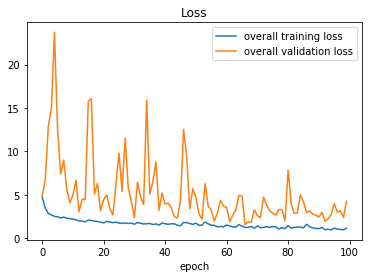

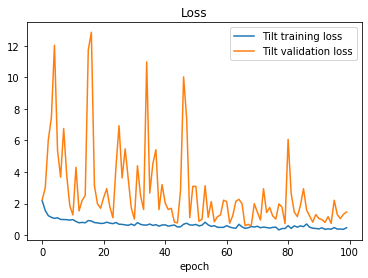

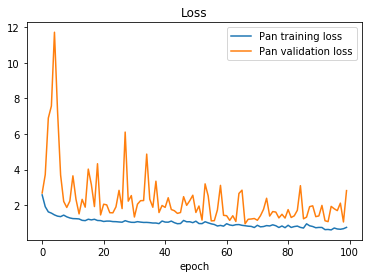

In [19]:
# Overall Loss curves
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.legend(['overall training loss', 'overall validation loss']) 
plt.title('Loss') 
plt.xlabel('epoch')
plt.show()

# Tilt Loss curves
plt.plot(history.history['tilt_loss']) 
plt.plot(history.history['val_tilt_loss']) 
plt.legend(['Tilt training loss', 'Tilt validation loss']) 
plt.title('Loss') 
plt.xlabel('epoch') 
plt.show()

# Pan Loss curves
plt.plot(history.history['pan_loss']) 
plt.plot(history.history['val_pan_loss']) 
plt.legend(['Pan training loss', 'Pan validation loss']) 
plt.title('Loss') 
plt.xlabel('epoch') 
plt.show()

From the learning curves of the model for each output, it can be observed that there is no overfitting. However, the model's curve fluctuates extremely which is an indication of the either:


1.   Batch Normalization
2.   Less Validation Data
3.   High Learning rate

The Learning rate is set to 0.001 which is low and also has a decay policy. There is very less validation data. Since the data is not augmented, the problem can be believed to be fixed by adding momentum to the Batch Normalization layer. 

###### **Incremental Changes**

Momentum is added to the model's Batch Normalization and trained to see the difference. 





In [20]:
def AlexNet():
    inputs = Input(shape=(28, 28, 3))

    x = Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu')(inputs)
    x = BatchNormalization(axis=-1, momentum=0.9)(x)
    x = MaxPooling2D(pool_size=(3,3), strides=(2,2))(x)

    x = Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same")(x)
    x = BatchNormalization(axis=-1, momentum=0.9)(x)
    x = MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="same")(x)

    x = Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same")(x)
    x = BatchNormalization(axis=-1, momentum=0.9)(x)

    # branch for tilt
    tilt = Conv2D(filters=384, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same")(x)
    tilt = BatchNormalization(axis=-1, momentum=0.9)(tilt)

    tilt = Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same")(tilt)
    tilt = BatchNormalization(axis=-1, momentum=0.9)(tilt)
    tilt = MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="same")(tilt)

    tilt = Flatten()(tilt)
    tilt = Dense(4096, activation='relu')(tilt)
    tilt = Dropout(0.5)(tilt)
    tilt = Dense(4096, activation='relu')(tilt)
    tilt = Dropout(0.5)(tilt)
    tilt = Dense(9, activation='softmax', name="tilt")(tilt)

    # branch for pan
    pan = Conv2D(filters=384, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same")(x)
    pan = BatchNormalization(axis=-1, momentum=0.9)(pan)

    pan = Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same")(pan)
    pan = BatchNormalization(axis=-1, momentum=0.9)(pan)
    pan = MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="same")(pan)

    pan = Flatten()(pan)
    pan = Dense(4096, activation='relu')(pan)
    pan = Dropout(0.5)(pan)
    pan = Dense(4096, activation='relu')(pan)
    pan = Dropout(0.5)(pan)
    pan = Dense(13, activation='softmax', name="pan")(pan)
    
    model = Model(inputs=inputs, outputs=[tilt, pan])
    return model


**Diagnostic Instrumentation**

The setting are not changed and the model with Batch Normalization having high momentum is complied.

In [21]:
# setting up hyperparameters

EPOCHS = 100
INIT_LR = 0.001
BS = 32
 
losses = {"tilt": "sparse_categorical_crossentropy", "pan": "sparse_categorical_crossentropy"}
lossWeights = {"tilt": 1.0, "pan": 1.0}

opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)

model = AlexNet()
model.compile(optimizer=opt, loss=losses, metrics=["accuracy"], loss_weights=lossWeights) 

In [23]:
history = model.fit(x = trainX, y={"tilt": trainTilt, "pan": trainPan}, validation_data=(valX, {"tilt": valTilt, "pan": valPan}), 
                    epochs=EPOCHS, batch_size = BS)

Train on 1860 samples, validate on 465 samples
Epoch 1/100
1860/1860 [==============================] - 20s 11ms/sample - loss: 2.0592 - tilt_loss: 0.8187 - pan_loss: 1.2579 - tilt_accuracy: 0.6661 - pan_accuracy: 0.4640 - val_loss: 2.5634 - val_tilt_loss: 1.0825 - val_pan_loss: 1.4740 - val_tilt_accuracy: 0.5613 - val_pan_accuracy: 0.4065
Epoch 2/100
1860/1860 [==============================] - 69s 37ms/sample - loss: 2.1921 - tilt_loss: 0.9061 - pan_loss: 1.2981 - tilt_accuracy: 0.6355 - pan_accuracy: 0.4371 - val_loss: 2.5668 - val_tilt_loss: 1.1247 - val_pan_loss: 1.4577 - val_tilt_accuracy: 0.5527 - val_pan_accuracy: 0.3570
Epoch 3/100
1860/1860 [==============================] - 85s 46ms/sample - loss: 2.0800 - tilt_loss: 0.9006 - pan_loss: 1.2484 - tilt_accuracy: 0.6581 - pan_accuracy: 0.4565 - val_loss: 3.3762 - val_tilt_loss: 1.4746 - val_pan_loss: 1.8978 - val_tilt_accuracy: 0.5075 - val_pan_accuracy: 0.2989
Epoch 4/100
1860/1860 [==============================] - 70s 38ms/sa

**Plotting train loss and validation loss curves to evaluate the model**

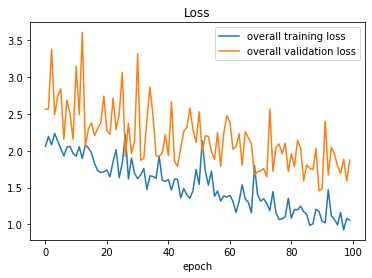

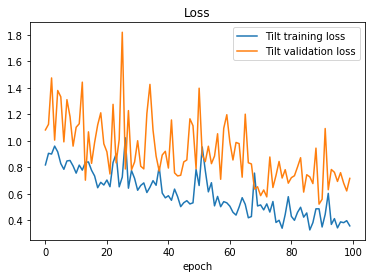

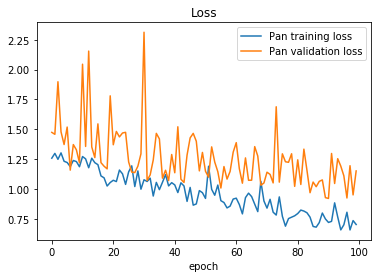

In [24]:
# Overall loss curves
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.legend(['overall training loss', 'overall validation loss']) 
plt.title('Loss') 
plt.xlabel('epoch')
plt.show()

# Tilt loss curves
plt.plot(history.history['tilt_loss']) 
plt.plot(history.history['val_tilt_loss']) 
plt.legend(['Tilt training loss', 'Tilt validation loss']) 
plt.title('Loss') 
plt.xlabel('epoch') 
plt.show()

# Pan loss curves
plt.plot(history.history['pan_loss']) 
plt.plot(history.history['val_pan_loss']) 
plt.legend(['Pan training loss', 'Pan validation loss']) 
plt.title('Loss') 
plt.xlabel('epoch') 
plt.show()

The model does not seem to perform better with high momentum. However the training curve fluctuates more than before. Therefore 0.9 is a momentum too high for the model and hence it is reduced in the next incremental change.

**Incremental Change**

The high momentum of the Batch Normalization of the model is reduced to 0.1.


In [25]:
def AlexNet():
    inputs = Input(shape=(28, 28, 3))

    x = Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu')(inputs)
    x = BatchNormalization(axis=-1, momentum=0.1)(x)
    x = MaxPooling2D(pool_size=(3,3), strides=(2,2))(x)

    x = Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same")(x)
    x = BatchNormalization(axis=-1, momentum=0.1)(x)
    x = MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="same")(x)

    x = Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same")(x)
    x = BatchNormalization(axis=-1, momentum=0.1)(x)

    # branch for tilt
    tilt = Conv2D(filters=384, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same")(x)
    tilt = BatchNormalization(axis=-1, momentum=0.1)(tilt)

    tilt = Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same")(tilt)
    tilt = BatchNormalization(axis=-1, momentum=0.1)(tilt)
    tilt = MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="same")(tilt)

    tilt = Flatten()(tilt)
    tilt = Dense(4096, activation='relu')(tilt)
    tilt = Dropout(0.5)(tilt)
    tilt = Dense(4096, activation='relu')(tilt)
    tilt = Dropout(0.5)(tilt)
    tilt = Dense(9, activation='softmax', name="tilt")(tilt)

    # branch for pan
    pan = Conv2D(filters=384, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same")(x)
    pan = BatchNormalization(axis=-1, momentum=0.1)(pan)

    pan = Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same")(pan)
    pan = BatchNormalization(axis=-1, momentum=0.1)(pan)
    pan = MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="same")(pan)

    pan = Flatten()(pan)
    pan = Dense(4096, activation='relu')(pan)
    pan = Dropout(0.5)(pan)
    pan = Dense(4096, activation='relu')(pan)
    pan = Dropout(0.5)(pan)
    pan = Dense(13, activation='softmax', name="pan")(pan)
    
    model = Model(inputs=inputs, outputs=[tilt, pan])
    return model


**Diagnostic Instrumentation**

The setting are not changed and the model with Batch Normalization having low momentum is complied.

In [26]:
# setting up hyperparameters

EPOCHS = 100
INIT_LR = 0.001
BS = 32
 
losses = {"tilt": "sparse_categorical_crossentropy", "pan": "sparse_categorical_crossentropy"}
lossWeights = {"tilt": 1.0, "pan": 1.0}

opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)

model = AlexNet()
model.compile(optimizer=opt, loss=losses, metrics=["accuracy"], loss_weights=lossWeights) 

In [27]:
history = model.fit(x = trainX, y={"tilt": trainTilt, "pan": trainPan}, validation_data=(valX, {"tilt": valTilt, "pan": valPan}), 
                    epochs=EPOCHS, batch_size = BS)

Train on 1860 samples, validate on 465 samples
Epoch 1/100
1860/1860 [==============================] - 28s 15ms/sample - loss: 4.8672 - tilt_loss: 2.2182 - pan_loss: 2.6517 - tilt_accuracy: 0.3005 - pan_accuracy: 0.1763 - val_loss: 11.9724 - val_tilt_loss: 6.3810 - val_pan_loss: 5.6015 - val_tilt_accuracy: 0.3333 - val_pan_accuracy: 0.1720
Epoch 2/100
1860/1860 [==============================] - 19s 10ms/sample - loss: 3.4432 - tilt_loss: 1.5527 - pan_loss: 1.9067 - tilt_accuracy: 0.4059 - pan_accuracy: 0.2785 - val_loss: 9.9089 - val_tilt_loss: 5.7744 - val_pan_loss: 4.1846 - val_tilt_accuracy: 0.2602 - val_pan_accuracy: 0.1828
Epoch 3/100
1860/1860 [==============================] - 38s 20ms/sample - loss: 2.9397 - tilt_loss: 1.3012 - pan_loss: 1.6407 - tilt_accuracy: 0.4613 - pan_accuracy: 0.3247 - val_loss: 4.7748 - val_tilt_loss: 2.6793 - val_pan_loss: 2.1115 - val_tilt_accuracy: 0.4387 - val_pan_accuracy: 0.2129
Epoch 4/100
1860/1860 [==============================] - 79s 42ms/s

**Plotting train loss and validation loss curves to evaluate the model**

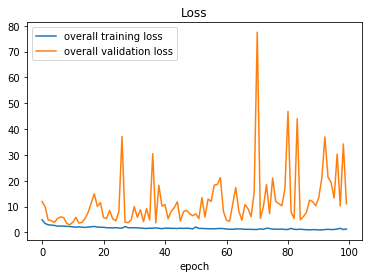

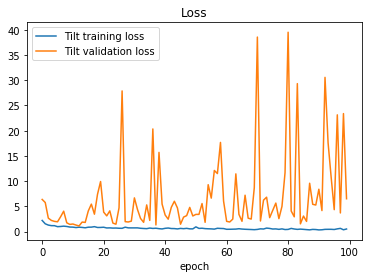

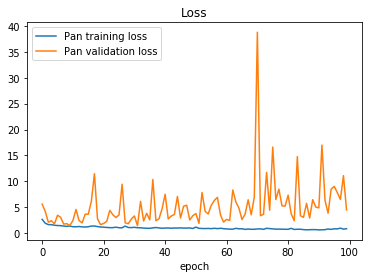

In [28]:
# Overall loss curves
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.legend(['overall training loss', 'overall validation loss']) 
plt.title('Loss') 
plt.xlabel('epoch')
plt.show()

# tilt loss curves
plt.plot(history.history['tilt_loss']) 
plt.plot(history.history['val_tilt_loss']) 
plt.legend(['Tilt training loss', 'Tilt validation loss']) 
plt.title('Loss') 
plt.xlabel('epoch') 
plt.show()

# pan loss curves
plt.plot(history.history['pan_loss']) 
plt.plot(history.history['val_pan_loss']) 
plt.legend(['Pan training loss', 'Pan validation loss']) 
plt.title('Loss') 
plt.xlabel('epoch') 
plt.show()

Having less momentum also seem to increase the fluctuations and slightly overfit the data. 

**Incremental Change**

In this step of debugging the model, an Alexnet with most commonly used l2 regularizer in every layer with a different optimizer can be trained. 


In [29]:
def AlexNet():
    inputs = Input(shape=(28, 28, 3))

    x = Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(inputs)
    x = BatchNormalization(axis=-1, momentum=0.1)(x)
    x = MaxPooling2D(pool_size=(3,3), strides=(2,2))(x)

    x = Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
    x = BatchNormalization(axis=-1, momentum=0.1)(x)
    x = MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="same")(x)

    x = Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
    x = BatchNormalization(axis=-1, momentum=0.1)(x)

    # branch for tilt
    tilt = Conv2D(filters=384, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
    tilt = BatchNormalization(axis=-1, momentum=0.1)(tilt)

    tilt = Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same", kernel_regularizer=tf.keras.regularizers.l2(0.001))(tilt)
    tilt = BatchNormalization(axis=-1, momentum=0.1)(tilt)
    tilt = MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="same")(tilt)

    tilt = Flatten()(tilt)
    tilt = Dense(4096, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(tilt)
    tilt = Dropout(0.5)(tilt)
    tilt = Dense(4096, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(tilt)
    tilt = Dropout(0.5)(tilt)
    tilt = Dense(9, activation='softmax', name="tilt", kernel_regularizer=tf.keras.regularizers.l2(0.001))(tilt)

    # branch for pan
    pan = Conv2D(filters=384, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
    pan = BatchNormalization(axis=-1, momentum=0.1)(pan)

    pan = Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same", kernel_regularizer=tf.keras.regularizers.l2(0.001))(pan)
    pan = BatchNormalization(axis=-1, momentum=0.1)(pan)
    pan = MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="same")(pan)

    pan = Flatten()(pan)
    pan = Dense(4096, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(pan)
    pan = Dropout(0.5)(pan)
    pan = Dense(4096, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(pan)
    pan = Dropout(0.5)(pan)
    pan = Dense(13, activation='softmax', name="pan", kernel_regularizer=tf.keras.regularizers.l2(0.001))(pan)
    
    model = Model(inputs=inputs, outputs=[tilt, pan])
    return model


**Diagnostic Instrumentation**

The optimizer is changed from Adam to SGD because sometimes in some cases when Adam has convergence problem, SGD with momentum could outperform.

In [30]:
from tensorflow.keras.optimizers import SGD

# setting up hyperparameters

EPOCHS = 100
INIT_LR = 0.001
BS = 32
 
losses = {"tilt": "sparse_categorical_crossentropy", "pan": "sparse_categorical_crossentropy"}
lossWeights = {"tilt": 1.0, "pan": 1.0}

opt = SGD(lr=INIT_LR, momentum=0.8, decay=INIT_LR / EPOCHS)

model = AlexNet()
model.compile(optimizer=opt, loss=losses, metrics=["accuracy"], loss_weights=lossWeights) 

In [31]:
history = model.fit(x = trainX, y={"tilt": trainTilt, "pan": trainPan}, validation_data=(valX, {"tilt": valTilt, "pan": valPan}), 
                    epochs=EPOCHS, batch_size = BS)

Train on 1860 samples, validate on 465 samples
Epoch 1/100
1860/1860 [==============================] - 123s 66ms/sample - loss: 15.6425 - tilt_loss: 2.0283 - pan_loss: 2.5805 - tilt_accuracy: 0.2194 - pan_accuracy: 0.1022 - val_loss: 15.3947 - val_tilt_loss: 1.9133 - val_pan_loss: 2.4477 - val_tilt_accuracy: 0.2688 - val_pan_accuracy: 0.1591
Epoch 2/100
1860/1860 [==============================] - 105s 56ms/sample - loss: 15.1685 - tilt_loss: 1.7642 - pan_loss: 2.3996 - tilt_accuracy: 0.3183 - pan_accuracy: 0.1715 - val_loss: 17.6571 - val_tilt_loss: 3.8955 - val_pan_loss: 2.7930 - val_tilt_accuracy: 0.2839 - val_pan_accuracy: 0.1720
Epoch 3/100
1860/1860 [==============================] - 41s 22ms/sample - loss: 14.7945 - tilt_loss: 1.5871 - pan_loss: 2.1969 - tilt_accuracy: 0.3661 - pan_accuracy: 0.2172 - val_loss: 17.6661 - val_tilt_loss: 2.5012 - val_pan_loss: 4.1804 - val_tilt_accuracy: 0.2774 - val_pan_accuracy: 0.1441
Epoch 4/100
1860/1860 [==============================] - 28s

**Plotting train loss and validation loss curves to evaluate the model**

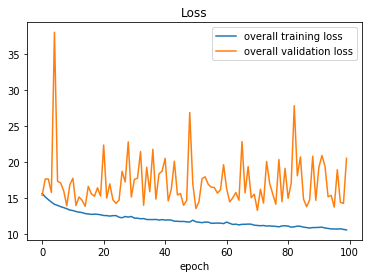

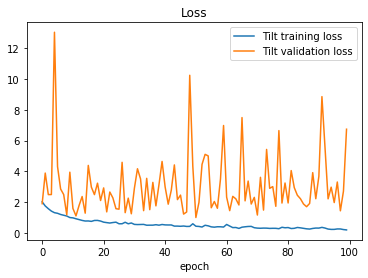

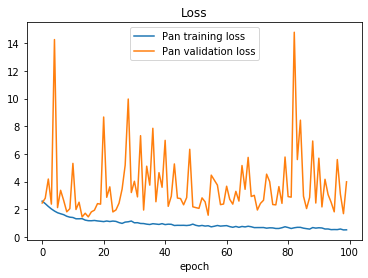

In [32]:
# Overall loss curves
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.legend(['overall training loss', 'overall validation loss']) 
plt.title('Loss') 
plt.xlabel('epoch')
plt.show()

# Tilt loss curves
plt.plot(history.history['tilt_loss']) 
plt.plot(history.history['val_tilt_loss']) 
plt.legend(['Tilt training loss', 'Tilt validation loss']) 
plt.title('Loss') 
plt.xlabel('epoch') 
plt.show()

# Pan loss curves
plt.plot(history.history['pan_loss']) 
plt.plot(history.history['val_pan_loss']) 
plt.legend(['Pan training loss', 'Pan validation loss']) 
plt.title('Loss') 
plt.xlabel('epoch') 
plt.show()

The model performs well in the train data but does not perform very well in the validation data. The curves indicate underfitting. SGD did not outperform Adam.

In most of the cases, the model performs better in the training set than in the validation set. This leads to the conclusion that the validation set is under representative of the train dataset. The next step would be to sacrifice the train set to get more data in the validation set. 

Generally, the first model with no regularization, no momentum and Adam optimizer performed better than any of the other modified model with decent training loss curve. The next change would be to use that model with more validation data with the same hyperparameters.

**Incremental Change**


In [34]:
def AlexNet():
    inputs = Input(shape=(28, 28, 3))

    x = Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu')(inputs)
    x = BatchNormalization(axis=-1)(x)
    x = MaxPooling2D(pool_size=(3,3), strides=(2,2))(x)

    x = Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same")(x)
    x = BatchNormalization(axis=-1)(x)
    x = MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="same")(x)

    x = Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same")(x)
    x = BatchNormalization(axis=-1)(x)

    # bracnh for tilt
    tilt = Conv2D(filters=384, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same")(x)
    tilt = BatchNormalization(axis=-1)(tilt)

    tilt = Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same")(tilt)
    tilt = BatchNormalization(axis=-1)(tilt)
    tilt = MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="same")(tilt)

    tilt = Flatten()(tilt)
    tilt = Dense(4096, activation='relu')(tilt)
    tilt = Dropout(0.5)(tilt)
    tilt = Dense(4096, activation='relu')(tilt)
    tilt = Dropout(0.5)(tilt)
    tilt = Dense(9, activation='softmax', name="tilt")(tilt)

    # branch for pan
    pan = Conv2D(filters=384, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same")(x)
    pan = BatchNormalization(axis=-1)(pan)

    pan = Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same")(pan)
    pan = BatchNormalization(axis=-1)(pan)
    pan = MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="same")(pan)

    pan = Flatten()(pan)
    pan = Dense(4096, activation='relu')(pan)
    pan = Dropout(0.5)(pan)
    pan = Dense(4096, activation='relu')(pan)
    pan = Dropout(0.5)(pan)
    pan = Dense(13, activation='softmax', name="pan")(pan)
    
    model = Model(inputs=inputs, outputs=[tilt, pan])
    return model


**Diagnostic Instrumentation**

The optimizer is set back to Adam, and the validation set size is increased.

In [33]:
# increasing validation set size
(trainX, valX, trainTilt, valTilt, trainPan, valPan) = train_test_split(normalized_train, traindata.iloc[:,3], traindata.iloc[:,4], test_size=0.4, random_state=1, shuffle = True)


In [35]:
# setting up hyperparameters

EPOCHS = 100
INIT_LR = 0.001
BS = 32
 
losses = {"tilt": "sparse_categorical_crossentropy", "pan": "sparse_categorical_crossentropy"}
lossWeights = {"tilt": 1.0, "pan": 1.0}

opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)

model = AlexNet()
model.compile(optimizer=opt, loss=losses, metrics=["accuracy"], loss_weights=lossWeights) 

history = model.fit(x = trainX, y={"tilt": trainTilt, "pan": trainPan}, validation_data=(valX, {"tilt": valTilt, "pan": valPan}), 
                    epochs=EPOCHS, batch_size = BS)

Train on 1395 samples, validate on 930 samples
Epoch 1/100
1395/1395 [==============================] - 20s 14ms/sample - loss: 5.0296 - tilt_loss: 2.2217 - pan_loss: 2.8033 - tilt_accuracy: 0.2989 - pan_accuracy: 0.1806 - val_loss: 4.7972 - val_tilt_loss: 2.1736 - val_pan_loss: 2.6411 - val_tilt_accuracy: 0.1559 - val_pan_accuracy: 0.0785
Epoch 2/100
1395/1395 [==============================] - 37s 26ms/sample - loss: 3.7625 - tilt_loss: 1.6755 - pan_loss: 2.0829 - tilt_accuracy: 0.3857 - pan_accuracy: 0.2430 - val_loss: 6.2518 - val_tilt_loss: 2.7579 - val_pan_loss: 3.5700 - val_tilt_accuracy: 0.1323 - val_pan_accuracy: 0.0914
Epoch 3/100
1395/1395 [==============================] - 69s 49ms/sample - loss: 3.0673 - tilt_loss: 1.3300 - pan_loss: 1.7463 - tilt_accuracy: 0.4373 - pan_accuracy: 0.3140 - val_loss: 13.5835 - val_tilt_loss: 9.6871 - val_pan_loss: 4.0845 - val_tilt_accuracy: 0.1323 - val_pan_accuracy: 0.0914
Epoch 4/100
1395/1395 [==============================] - 75s 54ms/s

**Plotting train loss and validation loss curves to evaluate the model**

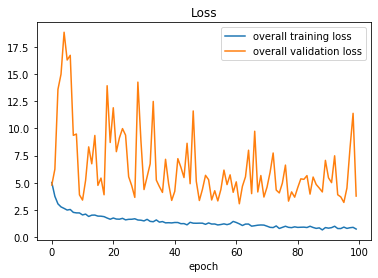

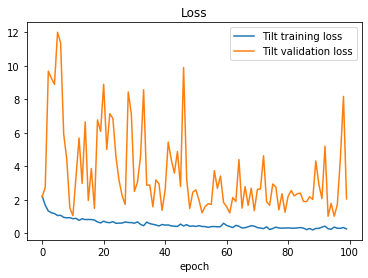

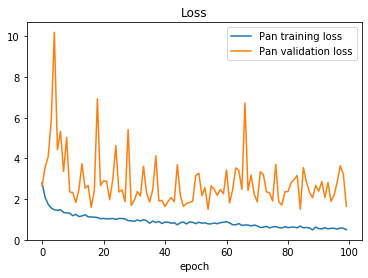

In [36]:
# Overall Loss curves
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.legend(['overall training loss', 'overall validation loss']) 
plt.title('Loss') 
plt.xlabel('epoch')
plt.show()

# Tilt Loss curves
plt.plot(history.history['tilt_loss']) 
plt.plot(history.history['val_tilt_loss']) 
plt.legend(['Tilt training loss', 'Tilt validation loss']) 
plt.title('Loss') 
plt.xlabel('epoch') 
plt.show()

# Pan Loss curves
plt.plot(history.history['pan_loss']) 
plt.plot(history.history['val_pan_loss']) 
plt.legend(['Pan training loss', 'Pan validation loss']) 
plt.title('Loss') 
plt.xlabel('epoch') 
plt.show()

The model continues to underfit the data and increase the generalization gap. This leads to the conclusion that the validation set is not a representitative set. The best performing model is the first one. Based on the curves obtained from that model, there is a possibility that increasing the epochs might hlep the model to converge since the two curves are close to each other. So the training settings are reset but with increased number of epochs.

###### **Model Building**


In [11]:
def AlexNet():
    inputs = Input(shape=(28, 28, 3))

    x = Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu')(inputs)
    x = BatchNormalization(axis=-1)(x)
    x = MaxPooling2D(pool_size=(3,3), strides=(2,2))(x)

    x = Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same")(x)
    x = BatchNormalization(axis=-1)(x)
    x = MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="same")(x)

    x = Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same")(x)
    x = BatchNormalization(axis=-1)(x)

    # branch for tilt
    tilt = Conv2D(filters=384, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same")(x)
    tilt = BatchNormalization(axis=-1)(tilt)

    tilt = Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same")(tilt)
    tilt = BatchNormalization(axis=-1)(tilt)
    tilt = MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="same")(tilt)

    tilt = Flatten()(tilt)
    tilt = Dense(4096, activation='relu')(tilt)
    tilt = Dropout(0.5)(tilt)
    tilt = Dense(4096, activation='relu')(tilt)
    tilt = Dropout(0.5)(tilt)
    tilt = Dense(9, activation='softmax', name="tilt")(tilt)

    # branch for pan
    pan = Conv2D(filters=384, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same")(x)
    pan = BatchNormalization(axis=-1)(pan)

    pan = Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same")(pan)
    pan = BatchNormalization(axis=-1)(pan)
    pan = MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="same")(pan)

    pan = Flatten()(pan)
    pan = Dense(4096, activation='relu')(pan)
    pan = Dropout(0.5)(pan)
    pan = Dense(4096, activation='relu')(pan)
    pan = Dropout(0.5)(pan)
    pan = Dense(13, activation='softmax', name="pan")(pan)
    
    model = Model(inputs=inputs, outputs=[tilt, pan])
    return model

**Diagnostic Instrumentation**

The initial baseline model with parameter setup is rebuilt and reset with 100 more epochs to train on. 

In [13]:
# setting up hyperparameters

EPOCHS = 200
INIT_LR = 0.001
BS = 32
 
losses = {"tilt": "sparse_categorical_crossentropy", "pan": "sparse_categorical_crossentropy"}
lossWeights = {"tilt": 1.0, "pan": 1.0}

opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)

model = AlexNet()
model.compile(optimizer=opt, loss=losses, metrics=["accuracy"], loss_weights=lossWeights) 

In [14]:
# setting back the original train validation split
(trainX, valX, trainTilt, valTilt, trainPan, valPan) = train_test_split(normalized_train, traindata.iloc[:,3], traindata.iloc[:,4], test_size=0.2, random_state=1)


In [15]:
history = model.fit(x = trainX, y={"tilt": trainTilt, "pan": trainPan}, validation_data=(valX, {"tilt": valTilt, "pan": valPan}), 
                    epochs=EPOCHS, batch_size = BS)

Train on 1860 samples, validate on 465 samples
Epoch 1/200
1860/1860 [==============================] - 16s 9ms/sample - loss: 4.7985 - tilt_loss: 2.1809 - pan_loss: 2.6380 - tilt_accuracy: 0.3323 - pan_accuracy: 0.1785 - val_loss: 5.0133 - val_tilt_loss: 2.3838 - val_pan_loss: 2.6444 - val_tilt_accuracy: 0.1462 - val_pan_accuracy: 0.0839
Epoch 2/200
1860/1860 [==============================] - 13s 7ms/sample - loss: 3.3704 - tilt_loss: 1.5008 - pan_loss: 1.8524 - tilt_accuracy: 0.4285 - pan_accuracy: 0.2935 - val_loss: 7.2407 - val_tilt_loss: 3.5524 - val_pan_loss: 3.7088 - val_tilt_accuracy: 0.1462 - val_pan_accuracy: 0.0839
Epoch 3/200
1860/1860 [==============================] - 55s 30ms/sample - loss: 2.8866 - tilt_loss: 1.2050 - pan_loss: 1.6836 - tilt_accuracy: 0.5134 - pan_accuracy: 0.3177 - val_loss: 14.8455 - val_tilt_loss: 8.1790 - val_pan_loss: 6.7570 - val_tilt_accuracy: 0.1441 - val_pan_accuracy: 0.0839
Epoch 4/200
1860/1860 [==============================] - 90s 48ms/sam

**Plotting train loss and validation loss curves to evaluate the model**

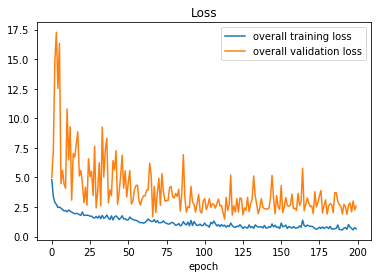

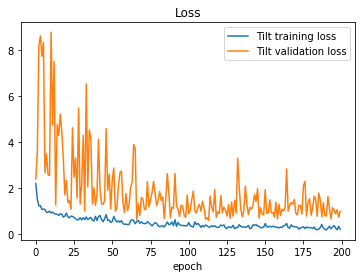

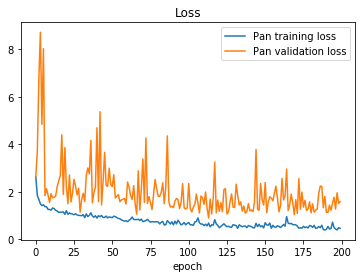

In [17]:
# Overall loss curve
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.legend(['overall training loss', 'overall validation loss']) 
plt.title('Loss') 
plt.xlabel('epoch')
plt.show()

# Tilt loss curve
plt.plot(history.history['tilt_loss']) 
plt.plot(history.history['val_tilt_loss']) 
plt.legend(['Tilt training loss', 'Tilt validation loss']) 
plt.title('Loss') 
plt.xlabel('epoch') 
plt.show()

# Pan loss curve
plt.plot(history.history['pan_loss']) 
plt.plot(history.history['val_pan_loss']) 
plt.legend(['Pan training loss', 'Pan validation loss']) 
plt.title('Loss') 
plt.xlabel('epoch') 
plt.show()

There is a generalization gap between the train and validation curve. But this model has less fluctuations in the train curve performing better than the remaining of the model. Hence it is selected as the final model. 

###### **Ultimate Judgement and Analysis**

This model as it is not the best model that can be developed and trained to perform the classification task. The model struggles to find the minimum gradient descent. The loss curves shows the model's limitations that the model is not performing in the desired way and the accuracies for both tilt and pan are very low. Using this model in a real world scenario will not be adviced since it might make a lot of mistakes in the unseen real world data which could lead to consequences when used in serious applications such as the driver monitoring systems. 

For better performance on this data:


1.   A more complex model can be built and trained on the data
2.   More data can be collected that better represents the data distribution
3.   Class imbalnce can be handled
4.   Better hyperparameter tuning


###### **Model Evaluation**



In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

(tiltProba, panProba) = model.predict(valX)

print('Confusion Matrix for Tilt')
print(confusion_matrix(valTilt, tiltProba.argmax(axis=1)))
print('\nClassification Report for Tilt')
print(classification_report(valTilt, tiltProba.argmax(axis=1)))

print('Confusion Matrix for Pan')
print(confusion_matrix(valPan, tiltProba.argmax(axis=1)))
print('\nClassification Report for Pan') 
print(classification_report(valPan, tiltProba.argmax(axis=1)))

Confusion Matrix for Tilt
[[ 2  1  3  0  0  0  0  0  0]
 [ 1 35 31  1  1  0  0  2  0]
 [ 0  0 39 22  2  0  0  0  0]
 [ 0  0  2 44  8  1  0  0  0]
 [ 0  0  0  6 58  6  0  0  0]
 [ 0  0  0  1  6 42  3  0  5]
 [ 0  0  1  0  0 15 48  2  2]
 [ 0  0  0  0  0  0  1 63  3]
 [ 0  0  0  0  0  0  0  2  6]]

Classification Report for Tilt
              precision    recall  f1-score   support

           0       0.67      0.33      0.44         6
           1       0.97      0.49      0.65        71
           2       0.51      0.62      0.56        63
           3       0.59      0.80      0.68        55
           4       0.77      0.83      0.80        70
           5       0.66      0.74      0.69        57
           6       0.92      0.71      0.80        68
           7       0.91      0.94      0.93        67
           8       0.38      0.75      0.50         8

    accuracy                           0.72       465
   macro avg       0.71      0.69      0.67       465
weighted avg       0.

/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The model accuracy for tilt is 72% and pan is 8% for the validation data. This is an indication that this model is yet not an optimal model to be used in real world because it is not viable to use such models with low performance metrics.

###### **Predicting Unseen Data**

This section is to make the model predict the tilt and pan classes in the test data (testdata). The predicted values are printed and saved in a csv file


In [19]:
# predicting unseen data
(tiltpredicted, panredicted) = model.predict(normalized_test)
tilt = tiltpredicted.argmax(axis=1)
pan = panredicted.argmax(axis=1)
tilt  = tilt_encoder.inverse_transform(tilt) 
pan = pan_encoder.inverse_transform(pan)

In [21]:
# adding the predicted list to dataframe
predictions = pd.read_csv("s1234567_predictions.csv")
predictions['tilt'] = tilt
predictions['pan'] = pan
predictions

,filename,tilt,pan
0,face_33.jpg,30,15
1,face_2148.jpg,-30,-30
2,face_2119.jpg,0,-60
3,face_1262.jpg,30,30
4,face_516.jpg,15,-60
...,...,...,...
460,face_2389.jpg,60,0
461,face_1799.jpg,90,-15
462,face_637.jpg,60,0
463,face_788.jpg,60,0


In [22]:
# saving predictions to csv file
predictions.to_csv("./s3774307_predictions.csv", index=False)